In [1]:
import pandas as pd

from datasetEval.dataloader import lact
from datasetEval.dataloader import diSipio
from pprint import pprint
import lightgbm as lgb
import matplotlib.pyplot as plt
import numpy as np
import pickle
import shap
from sklearn.model_selection import train_test_split, StratifiedKFold
import warnings
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import StratifiedShuffleSplit

corpus, y = lact.read('/home/sasce/Downloads/Classifications Dataset/LACT/msr09-data/43-software-systems', data='LACT')
#corpus, y = diSipio.read('/home/sasce/Downloads/Classifications Dataset/Di Sipio/evaluation/evaluation structure/ten_folder_100/root')

In [2]:
vectorizer = TfidfVectorizer(max_features=500)
X = vectorizer.fit_transform(corpus).todense()

In [3]:
X = pd.DataFrame(X, columns=vectorizer.get_feature_names())

In [4]:
# create a train/test split
random_state = 1337
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=random_state)
#sss =  StratifiedShuffleSplit(n_splits=1, test_size=0.5, random_state=0)(X, y, test_size=0.1, random_state=random_state)
#train_index, test_index = sss.split(X, y)[0]
#X_train, X_test = X[train_index], X[test_index]

In [13]:
import xgboost

#from sklearn.tree import DecisionTreeClassifier

#model = DecisionTreeClassifier(max_depth=10).fit(X_train, y_train)

# model = lgb.train(params, d_train, valid_sets=[d_test])

model = xgboost.XGBClassifier(max_depth=2)
model.fit(X_train,y_train)
predictions = model.predict_proba(X_test)

In [14]:
explainer = shap.TreeExplainer(model)
expected_value = explainer.expected_value
#print(f"Explainer expected value: {expected_value}")

In [15]:
select = range(5)
features = X_test.iloc[select]
#features_display = X_display.loc[features.index]

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    shap_values = explainer.shap_values(features)
    shap_interaction_values = explainer.shap_interaction_values(features)


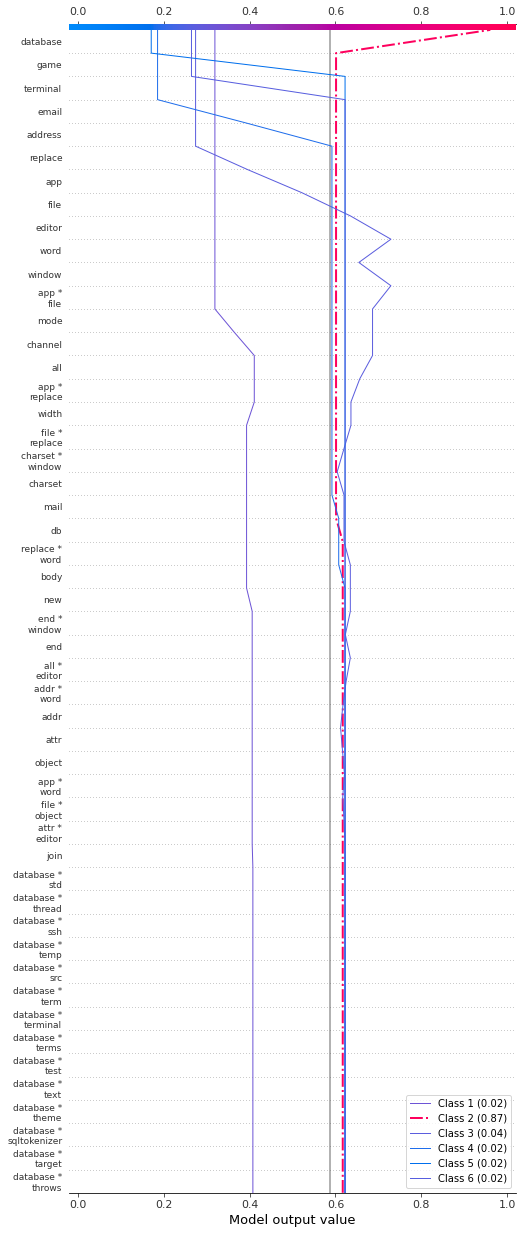

In [16]:
lbls = list(set(y))

def class_labels(row_index):
    return [f'Class {i + 1} ({predictions[row_index, i].round(2):.2f})' for i in range(len(lbls))]

row_index = 3
shap.multioutput_decision_plot(list(expected_value), shap_interaction_values,
                               row_index=row_index,
                               feature_names=vectorizer.get_feature_names(),
                               highlight=[np.argmax(predictions[row_index])],
                               legend_labels=class_labels(row_index),
                               legend_location='lower right',
                               link='logit',
                               new_base_value=expected_value.mean(),
                               feature_display_range=slice(-1, -51, -1))

In [17]:
y_test[3]

'database'

In [18]:
model.score(X_test, y_test)

0.8

In [19]:
model.score(X_train, y_train)

1.0

In [ ]:
from collections import defaultdict, Counter

k = 10
infor_words = defaultdict(lambda: Counter())
for sample_id in range(len(shap_values)):
    ind = np.argpartition(shap_values[y_test[sample_id]][sample_id], -k)[-k:]
    print(ind)
    infor_words[y_test[sample_id]].update(vectorizer.get_feature_names()[ind])

In [ ]:
np.mean(explainer.expected_value)

In [ ]:
expected_value[3]